In [61]:
# NOTE: Images must already be in './image/' directory. This can be done using the query_bing_images.py script

#%load preprocess_images.py
import numpy as np
import Image
import os

STANDARD_SIZE = (300, 167)
def img_to_matrix(filename, verbose=False):
    """ 
    Turns filename into numpy array of RGB pixels
    """
    img = Image.open(filename)
    if verbose==True:
        print "Changing size from %s to %s" % (str(img.size), str(STANDARD_SIZE))
    img = img.resize(STANDARD_SIZE)
    img = list(img.getdata())
    img = map(list, img)
    img = np.array(img)
    return img

def flatten_image(img):
    """ 
    Takes in (m,n) numpy array and flattens it into an array of shape (1, m*n)
    """
    s = img.shape[0] * img.shape[1]
    img_wide = img.reshape(1, s)
    return img_wide[0]

In [62]:
# %load processing_all_the_images.py
img_dir = "images/"
images = [img_dir + f for f in os.listdir(img_dir)]
labels = ["check" if "check" in f.split('/')[-1] else "drivers_license" for f in images]

data = []
for image in images:
    img = img_to_matrix(image)
    img = flatten_image(img)
    data.append(img)

data = np.array(data)

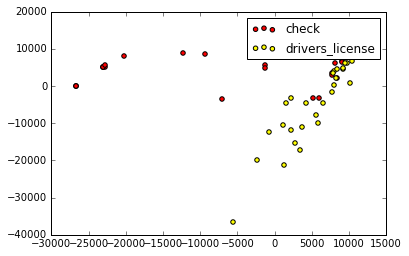

In [63]:
# %load randomized_pca_2d.py
%matplotlib inline
from sklearn.decomposition import RandomizedPCA
import pandas as pd
import matplotlib.pyplot as pl

pca = RandomizedPCA(n_components=2)
X = pca.fit_transform(data)
df = pd.DataFrame({"x": X[:, 0], "y": X[:, 1], "label":labels})
colors = ["red", "yellow"]
for label, color in zip(df['label'].unique(), colors):
    mask = df['label']==label
    pl.scatter(df[mask]['x'], df[mask]['y'], c=color, label=label)
pl.legend()
pl.show()

In [67]:
# %load train_knn_rpca.py
pca = RandomizedPCA(n_components=5)
train_x = pca.fit_transform(X)
test_x = pca.transform(X) #Thi

print train_x[:5]

knn = KNeighborsClassifier()
knn.fit(train_x, train_y)

[[ -8174.49192061  -6118.21844631]
 [ -9253.65226385 -10347.54389457]
 [ -9252.35467629 -10344.24180044]
 [ -2939.7677318   -8086.67637734]
 [  1305.61179284  -5603.16781032]]


NameError: name 'KNeighborsClassifier' is not defined